In [ ]:
import os
import pandas as pd
import numpy as np
import re
import json
from scipy.stats import pearsonr
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors
#from rdkit.Chem import MoleculeDescriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors

def canonicalize_smiles(smiles):
    """
    Return RDKit canonicalize SMILES.
    """
    return Chem.MolToSmiles(Chem.MolFromSmiles(smiles))

def calc_mordred_2Ddescriptors(smiles_list, file_path):
    """
    Calculate 1275 types (correctly calculated) Mordred 2D descriptors.
    Some calculations may not be possible if the computing environment or input molecules are different.
    """
    if not os.path.exists(file_path):
        mols = [Chem.AddHs(Chem.MolFromSmiles(smi)) for smi in smiles_list]
        '''
        my_desc_names = ['ABC','ABCGG','nAcid','nBase','SpAbs_A','SpMax_A','SpDiam_A','SpAD_A','SpMAD_A','LogEE_A','VE1_A','VE2_A','VE3_A','VR1_A','VR2_A','VR3_A','nAromAtom','nAromBond','nAtom','nHeavyAtom','nSpiro','nBridgehead','nHetero','nH','nB','nC','nN','nO','nS','nP','nF','nCl','nBr','nI','nX','ATS0dv','ATS1dv','ATS2dv','ATS3dv','ATS4dv','ATS5dv','ATS6dv','ATS7dv','ATS8dv','ATS0d','ATS1d','ATS2d','ATS3d','ATS4d','ATS5d','ATS6d','ATS7d','ATS8d','ATS0s','ATS1s','ATS2s','ATS3s','ATS4s','ATS5s','ATS6s','ATS7s','ATS8s','ATS0Z','ATS1Z','ATS2Z','ATS3Z','ATS4Z','ATS5Z','ATS6Z','ATS7Z','ATS8Z','ATS0m','ATS1m','ATS2m','ATS3m','ATS4m','ATS5m','ATS6m','ATS7m','ATS8m','ATS0v','ATS1v','ATS2v','ATS3v','ATS4v','ATS5v','ATS6v','ATS7v','ATS8v','ATS0se','ATS1se','ATS2se','ATS3se','ATS4se','ATS5se','ATS6se','ATS7se','ATS8se','ATS0pe','ATS1pe','ATS2pe','ATS3pe','ATS4pe','ATS5pe','ATS6pe','ATS7pe','ATS8pe','ATS0are','ATS1are','ATS2are','ATS3are','ATS4are','ATS5are','ATS6are','ATS7are','ATS8are','ATS0p','ATS1p','ATS2p','ATS3p','ATS4p','ATS5p','ATS6p','ATS7p','ATS8p','ATS0i','ATS1i','ATS2i','ATS3i','ATS4i','ATS5i','ATS6i','ATS7i','ATS8i','AATS0dv','AATS1dv','AATS2dv','AATS3dv','AATS4dv','AATS5dv','AATS0d','AATS1d','AATS2d','AATS3d','AATS4d','AATS5d','AATS0s','AATS1s','AATS2s','AATS3s','AATS4s','AATS5s','AATS0Z','AATS1Z','AATS2Z','AATS3Z','AATS4Z','AATS5Z','AATS0m','AATS1m','AATS2m','AATS3m','AATS4m','AATS5m','AATS0v','AATS1v','AATS2v','AATS3v','AATS4v','AATS5v','AATS0se','AATS1se','AATS2se','AATS3se','AATS4se','AATS5se','AATS0pe','AATS1pe','AATS2pe','AATS3pe','AATS4pe','AATS5pe','AATS0are','AATS1are','AATS2are','AATS3are','AATS4are','AATS5are','AATS0p','AATS1p','AATS2p','AATS3p','AATS4p','AATS5p','AATS0i','AATS1i','AATS2i','AATS3i','AATS4i','AATS5i','ATSC0c','ATSC1c','ATSC2c','ATSC3c','ATSC4c','ATSC5c','ATSC6c','ATSC7c','ATSC8c','ATSC0dv','ATSC1dv','ATSC2dv','ATSC3dv','ATSC4dv','ATSC5dv','ATSC6dv','ATSC7dv','ATSC8dv','ATSC0d','ATSC1d','ATSC2d','ATSC3d','ATSC4d','ATSC5d','ATSC6d','ATSC7d','ATSC8d','ATSC0s','ATSC1s','ATSC2s','ATSC3s','ATSC4s','ATSC5s','ATSC6s','ATSC7s','ATSC8s','ATSC0Z','ATSC1Z','ATSC2Z','ATSC3Z','ATSC4Z','ATSC5Z','ATSC6Z','ATSC7Z','ATSC8Z','ATSC0m','ATSC1m','ATSC2m','ATSC3m','ATSC4m','ATSC5m','ATSC6m','ATSC7m','ATSC8m','ATSC0v','ATSC1v','ATSC2v','ATSC3v','ATSC4v','ATSC5v','ATSC6v','ATSC7v','ATSC8v','ATSC0se','ATSC1se','ATSC2se','ATSC3se','ATSC4se','ATSC5se','ATSC6se','ATSC7se','ATSC8se','ATSC0pe','ATSC1pe','ATSC2pe','ATSC3pe','ATSC4pe','ATSC5pe','ATSC6pe','ATSC7pe','ATSC8pe','ATSC0are','ATSC1are','ATSC2are','ATSC3are','ATSC4are','ATSC5are','ATSC6are','ATSC7are','ATSC8are','ATSC0p','ATSC1p','ATSC2p','ATSC3p','ATSC4p','ATSC5p','ATSC6p','ATSC7p','ATSC8p','ATSC0i','ATSC1i','ATSC2i','ATSC3i','ATSC4i','ATSC5i','ATSC6i','ATSC7i','ATSC8i','AATSC0c','AATSC1c','AATSC2c','AATSC3c','AATSC4c','AATSC5c','AATSC0dv','AATSC1dv','AATSC2dv','AATSC3dv','AATSC4dv','AATSC5dv','AATSC0d','AATSC1d','AATSC2d','AATSC3d','AATSC4d','AATSC5d','AATSC0s','AATSC1s','AATSC2s','AATSC3s','AATSC4s','AATSC5s','AATSC0Z','AATSC1Z','AATSC2Z','AATSC3Z','AATSC4Z','AATSC5Z','AATSC0m','AATSC1m','AATSC2m','AATSC3m','AATSC4m','AATSC5m','AATSC0v','AATSC1v','AATSC2v','AATSC3v','AATSC4v','AATSC5v','AATSC0se','AATSC1se','AATSC2se','AATSC3se','AATSC4se','AATSC5se','AATSC0pe','AATSC1pe','AATSC2pe','AATSC3pe','AATSC4pe','AATSC5pe','AATSC0are','AATSC1are','AATSC2are','AATSC3are','AATSC4are','AATSC5are','AATSC0p','AATSC1p','AATSC2p','AATSC3p','AATSC4p','AATSC5p','AATSC0i','AATSC1i','AATSC2i','AATSC3i','AATSC4i','AATSC5i','MATS1c','MATS2c','MATS3c','MATS4c','MATS5c','MATS1dv','MATS2dv','MATS3dv','MATS4dv','MATS5dv','MATS1d','MATS2d','MATS3d','MATS4d','MATS5d','MATS1s','MATS2s','MATS3s','MATS4s','MATS5s','MATS1Z','MATS2Z','MATS3Z','MATS4Z','MATS5Z','MATS1m','MATS2m','MATS3m','MATS4m','MATS5m','MATS1v','MATS2v','MATS3v','MATS4v','MATS5v','MATS1se','MATS2se','MATS3se','MATS4se','MATS5se','MATS1pe','MATS2pe','MATS3pe','MATS4pe','MATS5pe','MATS1are','MATS2are','MATS3are','MATS4are','MATS5are','MATS1p','MATS2p','MATS3p','MATS4p','MATS5p','MATS1i','MATS2i','MATS3i','MATS4i','MATS5i','GATS1c','GATS2c','GATS3c','GATS4c','GATS5c','GATS1dv','GATS2dv','GATS3dv','GATS4dv','GATS5dv','GATS1d','GATS2d','GATS3d','GATS4d','GATS5d','GATS1s','GATS2s','GATS3s','GATS4s','GATS5s','GATS1Z','GATS2Z','GATS3Z','GATS4Z','GATS5Z','GATS1m','GATS2m','GATS3m','GATS4m','GATS5m','GATS1v','GATS2v','GATS3v','GATS4v','GATS5v','GATS1se','GATS2se','GATS3se','GATS4se','GATS5se','GATS1pe','GATS2pe','GATS3pe','GATS4pe','GATS5pe','GATS1are','GATS2are','GATS3are','GATS4are','GATS5are','GATS1p','GATS2p','GATS3p','GATS4p','GATS5p','GATS1i','GATS2i','GATS3i','GATS4i','GATS5i','BCUTc-1h','BCUTc-1l','BCUTdv-1h','BCUTdv-1l','BCUTd-1h','BCUTd-1l','BCUTs-1h','BCUTs-1l','BCUTZ-1h','BCUTZ-1l','BCUTm-1h','BCUTm-1l','BCUTv-1h','BCUTv-1l','BCUTse-1h','BCUTse-1l','BCUTpe-1h','BCUTpe-1l','BCUTare-1h','BCUTare-1l','BCUTp-1h','BCUTp-1l','BCUTi-1h','BCUTi-1l','BalabanJ','SpAbs_DzZ','SpMax_DzZ','SpDiam_DzZ','SpAD_DzZ','SpMAD_DzZ','LogEE_DzZ','SM1_DzZ','VE1_DzZ','VE2_DzZ','VE3_DzZ','VR1_DzZ','VR2_DzZ','VR3_DzZ','SpAbs_Dzm','SpMax_Dzm','SpDiam_Dzm','SpAD_Dzm','SpMAD_Dzm','LogEE_Dzm','SM1_Dzm','VE1_Dzm','VE2_Dzm','VE3_Dzm','VR1_Dzm','VR2_Dzm','VR3_Dzm','SpAbs_Dzv','SpMax_Dzv','SpDiam_Dzv','SpAD_Dzv','SpMAD_Dzv','LogEE_Dzv','SM1_Dzv','VE1_Dzv','VE2_Dzv','VE3_Dzv','VR1_Dzv','VR2_Dzv','VR3_Dzv','SpAbs_Dzse','SpMax_Dzse','SpDiam_Dzse','SpAD_Dzse','SpMAD_Dzse','LogEE_Dzse','SM1_Dzse','VE1_Dzse','VE2_Dzse','VE3_Dzse','VR1_Dzse','VR2_Dzse','VR3_Dzse','SpAbs_Dzpe','SpMax_Dzpe','SpDiam_Dzpe','SpAD_Dzpe','SpMAD_Dzpe','LogEE_Dzpe','SM1_Dzpe','VE1_Dzpe','VE2_Dzpe','VE3_Dzpe','VR1_Dzpe','VR2_Dzpe','VR3_Dzpe','SpAbs_Dzare','SpMax_Dzare','SpDiam_Dzare','SpAD_Dzare','SpMAD_Dzare','LogEE_Dzare','SM1_Dzare','VE1_Dzare','VE2_Dzare','VE3_Dzare','VR1_Dzare','VR2_Dzare','VR3_Dzare','SpAbs_Dzp','SpMax_Dzp','SpDiam_Dzp','SpAD_Dzp','SpMAD_Dzp','LogEE_Dzp','SM1_Dzp','VE1_Dzp','VE2_Dzp','VE3_Dzp','VR1_Dzp','VR2_Dzp','VR3_Dzp','SpAbs_Dzi','SpMax_Dzi','SpDiam_Dzi','SpAD_Dzi','SpMAD_Dzi','LogEE_Dzi','SM1_Dzi','VE1_Dzi','VE2_Dzi','VE3_Dzi','VR1_Dzi','VR2_Dzi','VR3_Dzi','BertzCT','nBonds','nBondsO','nBondsS','nBondsD','nBondsT','nBondsA','nBondsM','nBondsKS','nBondsKD','RNCG','RPCG','C1SP1','C2SP1','C1SP2','C2SP2','C3SP2','C1SP3','C2SP3','C3SP3','C4SP3','HybRatio','FCSP3','Xch-3d','Xch-4d','Xch-5d','Xch-6d','Xch-7d','Xch-3dv','Xch-4dv','Xch-5dv','Xch-6dv','Xch-7dv','Xc-3d','Xc-4d','Xc-5d','Xc-6d','Xc-3dv','Xc-4dv','Xc-5dv','Xc-6dv','Xpc-4d','Xpc-5d','Xpc-6d','Xpc-4dv','Xpc-5dv','Xpc-6dv','Xp-0d','Xp-1d','Xp-2d','Xp-3d','Xp-4d','Xp-5d','Xp-6d','Xp-7d','AXp-0d','AXp-1d','AXp-2d','AXp-3d','AXp-4d','Xp-0dv','Xp-1dv','Xp-2dv','Xp-3dv','Xp-4dv','Xp-5dv','Xp-6dv','Xp-7dv','AXp-0dv','AXp-1dv','AXp-2dv','AXp-3dv','AXp-4dv','SZ','Sm','Sv','Sse','Spe','Sare','Sp','Si','MZ','Mm','Mv','Mse','Mpe','Mare','Mp','Mi','SpAbs_D','SpMax_D','SpDiam_D','SpAD_D','SpMAD_D','LogEE_D','VE1_D','VE2_D','VE3_D','VR1_D','VR2_D','VR3_D','NsLi','NssBe','NssssBe','NssBH','NsssB','NssssB','NsCH3','NdCH2','NssCH2','NtCH','NdsCH','NaaCH','NsssCH','NddC','NtsC','NdssC','NaasC','NaaaC','NssssC','NsNH3','NsNH2','NssNH2','NdNH','NssNH','NaaNH','NtN','NsssNH','NdsN','NaaN','NsssN','NddsN','NaasN','NssssN','NsOH','NdO','NssO','NaaO','NsF','NsSiH3','NssSiH2','NsssSiH','NssssSi','NsPH2','NssPH','NsssP','NdsssP','NsssssP','NsSH','NdS','NssS','NaaS','NdssS','NddssS','NsCl','NsGeH3','NssGeH2','NsssGeH','NssssGe','NsAsH2','NssAsH','NsssAs','NsssdAs','NsssssAs','NsSeH','NdSe','NssSe','NaaSe','NdssSe','NddssSe','NsBr','NsSnH3','NssSnH2','NsssSnH','NssssSn','NsI','NsPbH3','NssPbH2','NsssPbH','NssssPb','SsLi','SssBe','SssssBe','SssBH','SsssB','SssssB','SsCH3','SdCH2','SssCH2','StCH','SdsCH','SaaCH','SsssCH','SddC','StsC','SdssC','SaasC','SaaaC','SssssC','SsNH3','SsNH2','SssNH2','SdNH','SssNH','SaaNH','StN','SsssNH','SdsN','SaaN','SsssN','SddsN','SaasN','SssssN','SsOH','SdO','SssO','SaaO','SsF','SsSiH3','SssSiH2','SsssSiH','SssssSi','SsPH2','SssPH','SsssP','SdsssP','SsssssP','SsSH','SdS','SssS','SaaS','SdssS','SddssS','SsCl','SsGeH3','SssGeH2','SsssGeH','SssssGe','SsAsH2','SssAsH','SsssAs','SsssdAs','SsssssAs','SsSeH','SdSe','SssSe','SaaSe','SdssSe','SddssSe','SsBr','SsSnH3','SssSnH2','SsssSnH','SssssSn','SsI','SsPbH3','SssPbH2','SsssPbH','SssssPb','MAXdO','MINdO','ECIndex','ETA_alpha','AETA_alpha','ETA_shape_p','ETA_shape_y','ETA_shape_x','ETA_beta','AETA_beta','ETA_beta_s','AETA_beta_s','ETA_beta_ns','AETA_beta_ns','ETA_beta_ns_d','AETA_beta_ns_d','ETA_eta','AETA_eta','ETA_eta_L','AETA_eta_L','ETA_eta_R','AETA_eta_R','ETA_eta_RL','AETA_eta_RL','ETA_eta_F','AETA_eta_F','ETA_eta_FL','AETA_eta_FL','ETA_eta_B','AETA_eta_B','ETA_eta_BR','AETA_eta_BR','ETA_dAlpha_A','ETA_dAlpha_B','ETA_epsilon_1','ETA_epsilon_2','ETA_epsilon_3','ETA_epsilon_4','ETA_epsilon_5','ETA_dEpsilon_A','ETA_dEpsilon_B','ETA_dEpsilon_C','ETA_dEpsilon_D','ETA_dBeta','AETA_dBeta','ETA_psi_1','ETA_dPsi_A','ETA_dPsi_B','fragCpx','fMF','nHBAcc','nHBDon','IC0','IC1','IC2','IC3','IC4','IC5','TIC0','TIC1','TIC2','TIC3','TIC4','TIC5','SIC0','SIC1','SIC2','SIC3','SIC4','SIC5','BIC0','BIC1','BIC2','BIC3','BIC4','BIC5','CIC0','CIC1','CIC2','CIC3','CIC4','CIC5','MIC0','MIC1','MIC2','MIC3','MIC4','MIC5','ZMIC0','ZMIC1','ZMIC2','ZMIC3','ZMIC4','ZMIC5','Kier1','Kier2','Kier3','FilterItLogS','VMcGowan','LabuteASA','PEOE_VSA1','PEOE_VSA2','PEOE_VSA3','PEOE_VSA4','PEOE_VSA5','PEOE_VSA6','PEOE_VSA7','PEOE_VSA8','PEOE_VSA9','PEOE_VSA10','PEOE_VSA11','PEOE_VSA12','PEOE_VSA13','SMR_VSA1','SMR_VSA2','SMR_VSA3','SMR_VSA4','SMR_VSA5','SMR_VSA6','SMR_VSA7','SMR_VSA8','SMR_VSA9','SlogP_VSA1','SlogP_VSA2','SlogP_VSA3','SlogP_VSA4','SlogP_VSA5','SlogP_VSA6','SlogP_VSA7','SlogP_VSA8','SlogP_VSA9','SlogP_VSA10','SlogP_VSA11','EState_VSA1','EState_VSA2','EState_VSA3','EState_VSA4','EState_VSA5','EState_VSA6','EState_VSA7','EState_VSA8','EState_VSA9','EState_VSA10','VSA_EState1','VSA_EState2','VSA_EState3','VSA_EState4','VSA_EState5','VSA_EState6','VSA_EState7','VSA_EState8','VSA_EState9','MID','AMID','MID_h','AMID_h','MID_C','AMID_C','MID_N','AMID_N','MID_O','AMID_O','MID_X','AMID_X','MPC2','MPC3','MPC4','MPC5','MPC6','MPC7','MPC8','MPC9','MPC10','TMPC10','piPC1','piPC2','piPC3','piPC4','piPC5','piPC6','piPC7','piPC8','piPC9','piPC10','TpiPC10','apol','bpol','nRing','n3Ring','n4Ring','n5Ring','n6Ring','n7Ring','n8Ring','n9Ring','n10Ring','n11Ring','n12Ring','nG12Ring','nHRing','n3HRing','n4HRing','n5HRing','n6HRing','n7HRing','n8HRing','n9HRing','n10HRing','n11HRing','n12HRing','nG12HRing','naRing','n3aRing','n4aRing','n5aRing','n6aRing','n7aRing','n8aRing','n9aRing','n10aRing','n11aRing','n12aRing','nG12aRing','naHRing','n3aHRing','n4aHRing','n5aHRing','n6aHRing','n7aHRing','n8aHRing','n9aHRing','n10aHRing','n11aHRing','n12aHRing','nG12aHRing','nARing','n3ARing','n4ARing','n5ARing','n6ARing','n7ARing','n8ARing','n9ARing','n10ARing','n11ARing','n12ARing','nG12ARing','nAHRing','n3AHRing','n4AHRing','n5AHRing','n6AHRing','n7AHRing','n8AHRing','n9AHRing','n10AHRing','n11AHRing','n12AHRing','nG12AHRing','nFRing','n4FRing','n5FRing','n6FRing','n7FRing','n8FRing','n9FRing','n10FRing','n11FRing','n12FRing','nG12FRing','nFHRing','n4FHRing','n5FHRing','n6FHRing','n7FHRing','n8FHRing','n9FHRing','n10FHRing','n11FHRing','n12FHRing','nG12FHRing','nFaRing','n4FaRing','n5FaRing','n6FaRing','n7FaRing','n8FaRing','n9FaRing','n10FaRing','n11FaRing','n12FaRing','nG12FaRing','nFaHRing','n4FaHRing','n5FaHRing','n6FaHRing','n7FaHRing','n8FaHRing','n9FaHRing','n10FaHRing','n11FaHRing','n12FaHRing','nG12FaHRing','nFARing','n4FARing','n5FARing','n6FARing','n7FARing','n8FARing','n9FARing','n10FARing','n11FARing','n12FARing','nG12FARing','nFAHRing','n4FAHRing','n5FAHRing','n6FAHRing','n7FAHRing','n8FAHRing','n9FAHRing','n10FAHRing','n11FAHRing','n12FAHRing','nG12FAHRing','nRot','RotRatio','SLogP','SMR','TopoPSA(NO)','TopoPSA','GGI1','GGI2','GGI3','GGI4','GGI5','GGI6','GGI7','GGI8','GGI9','GGI10','JGI1','JGI2','JGI3','JGI4','JGI5','JGI6','JGI7','JGI8','JGI9','JGI10','JGT10','Diameter','Radius','TopoShapeIndex','PetitjeanIndex','Vabc','VAdjMat','MWC01','MWC02','MWC03','MWC04','MWC05','MWC06','MWC07','MWC08','MWC09','MWC10','TMWC10','SRW02','SRW03','SRW04','SRW05','SRW06','SRW07','SRW08','SRW09','SRW10','TSRW10','MW','AMW','WPath','WPol','Zagreb1','Zagreb2','mZagreb1','mZagreb2']'''







        #my_desc_names =['IC2', 'TSRW10', 'SlogP_VSA8', 'SaaN', 'PEOE_VSA9', 'n6aRing', 'nAcid', 'piPC6', 'n6aHRing', 'SMR_VSA9', 'VR3_A', 'ATSC2s', 'MINdO', 'Xch-5d', 'nHRing', 'BCUTc-1h', 'PEOE_VSA3', 'BCUTZ-1l', 'ATSC1i', 'GATS4d', 'AATS5p', 'BalabanJ', 'SaasN', 'GATS4s', 'VSA_EState7', 'AATS3p', 'ATSC8i', 'BCUTse-1l', 'BCUTd-1l', 'IC3', 'AMID_O', 'BCUTc-1l', 'SssCH2', 'PEOE_VSA8', 'SMR_VSA6', 'RPCG', 'BCUTi-1l', 'VE1_A', 'VSA_EState6', 'AMID_N', 'n9FaRing', 'AATSC1d', 'BCUTi-1h', 'GATS3s', 'AATSC2d', 'SpMax_A', 'SpDiam_A', 'RotRatio', 'GATS1d', 'GATS4Z', 'BCUTdv-1l', 'AATSC3c', 'MATS2c', 'GATS3c', 'ATSC0p', 'GATS4dv', 'GATS5c', 'GATS5i', 'GATS5s', 'n9FRing', 'AETA_beta_ns_d', 'GATS2d', 'MPC10', 'GATS2s', 'ATSC5i', 'MATS1v', 'ATSC2dv', 'VSA_EState4', 'GATS4c', 'GATS1s', 'ATSC6i', 'EState_VSA4', 'AATS3i', 'n5Ring', 'piPC3', 'EState_VSA8', 'GATS3v', 'AATSC5c', 'SaasC', 'GATS1c', 'GATS3p', 'ATSC7i', 'RNCG', 'PEOE_VSA13', 'GATS2Z', 'Xch-6d', 'Xch-6dv', 'MATS4s', 'JGI9', 'GATS1m', 'GATS4p', 'AATSC1i', 'ATSC8v', 'MATS1s', 'VE2_Dzv', 'SaaO', 'AETA_beta_s', 'MAXdO', 'AATSC4c', 'GATS5d', 'BCUTv-1h', 'ATSC8d', 'PEOE_VSA6', 'AATSC1s', 'naRing', 'BCUTd-1h', 'ATSC8p', 'AATSC1dv', 'ATSC5Z', 'AATSC1se', 'ATSC7d', 'ATSC3dv', 'AATSC5d', 'JGI7', 'JGI5', 'AATSC4s', 'GATS2c', 'JGI2', 'AATS4i', 'AATS1i', 'GATS4are', 'JGI4', 'GATS5Z', 'CIC5', 'JGI10', 'GATS2i', 'ETA_dEpsilon_D', 'AATS5Z', 'ATSC4d', 'AETA_alpha', 'MATS5dv', 'ATSC7p', 'AATS3dv', 'GATS3i', 'AATSC1c', 'C3SP2', 'MATS4d', 'AATS4p', 'GATS3m', 'MATS2dv', 'AATSC5s', 'AXp-1d', 'ATSC5d', 'MATS4pe', 'AATS3d', 'AATSC5Z', 'GATS3d', 'GATS5p']
        my_desc_names =['SlogP_VSA8', 'IC2', 'PEOE_VSA9', 'Xch-5d', 'NsOH', 'nG12FRing', 'MINdO', 'BCUTZ-1l', 'GATS1d', 'VR3_A', 'IC3', 'BCUTc-1h', 'SMR_VSA6', 'nAcid', 'AATS3p', 'AATS3Z', 'GATS4s', 'SssO', 'BCUTc-1l', 'AATS5p', 'BCUTpe-1l', 'BalabanJ', 'VE2_Dzv', 'AMID_X', 'SMR_VSA9', 'MAXdO', 'AATS3dv', 'AATS4s', 'GATS4d', 'PEOE_VSA8', 'AMID_O', 'BCUTi-1l', 'AMID_N', 'SsF', 'GATS4m', 'n6aRing', 'MATS4m', 'SaasC', 'GATS3c', 'VSA_EState6', 'n9FARing', 'ATSC2i', 'GATS5c', 'VSA_EState7', 'GATS4p', 'ATSC7d', 'VE1_A', 'ATSC2s', 'MPC10', 'ATSC4m', 'ETA_dEpsilon_D', 'ATSC8Z', 'AATSC4c', 'AATSC1d', 'n6aHRing', 'MATS2c', 'nHRing', 'EState_VSA4', 'GATS2c', 'SpMax_A', 'AATSC3d', 'piPC6', 'AATSC1p', 'SaaN', 'SpDiam_A', 'GATS3d', 'EState_VSA3', 'AATSC2d', 'JGI3', 'JGI4', 'GATS1dv', 'GATS2d', 'MATS5c', 'GATS2m', 'RNCG', 'BCUTse-1h', 'Xch-7d', 'BCUTd-1h', 'GATS4dv', 'AATSC1se', 'MATS4pe', 'GATS5i', 'ATSC1v', 'GATS1s', 'C3SP2', 'MATS1p', 'GATS5Z', 'GATS1c', 'ATSC6p', 'RotRatio', 'Xch-7dv', 'ATSC6i', 'GATS3i', 'MATS5pe', 'AATS5dv', 'ATSC7Z', 'AXp-4dv', 'BIC5', 'AATSC1Z', 'ATSC6v', 'ATSC8v', 'GATS4c', 'BCUTd-1l', 'nBase', 'ATSC7i', 'ETA_shape_y', 'JGI8', 'AATSC0c', 'RPCG', 'JGI6', 'ATSC8i', 'ATSC6d', 'ATSC7p', 'JGI9', 'SssCH2', 'EState_VSA6', 'AATSC3c', 'SaasN', 'AATSC4s', 'PEOE_VSA11', 'GATS4are', 'AATSC1are', 'AATSC1c', 'ATSC0p', 'MATS4s', 'SaaO']
        my_descs = []
        # NOTE: ignore_3D=True
        calc_dummy = Calculator(descriptors, ignore_3D=True)
        for i, desc in enumerate(calc_dummy.descriptors):
            if desc.__str__()  in my_desc_names:
                my_descs.append(desc)
        calc = Calculator(my_descs, ignore_3D=True)
        df_mordred = calc.pandas(mols)
        df_mordred.to_csv(file_path, index=False)
        print('初始版已保存') # 如果是val或者test可以在这里打断点
    
        df_mordred = df_mordred.apply(lambda x: pd.to_numeric(x, errors='coerce'))####
        df_mordred = df_mordred.dropna(axis=1, how='all')
        df_mordred = df_mordred.fillna(df_mordred.mean())
        df_mordred = df_mordred.replace([np.inf, -np.inf], np.nan).fillna(df_mordred.max())
        df_mordred.to_csv(file_path, index=False)
    else:
        print("Mordred 2D descriptors already exists.")
        
def calc_rdkit_descriptors(smiles_list, file_path):
    """
    Calculate 208 types RDKit 2D descriptors.
    """
    if not os.path.exists(file_path):
        descs = [desc_name[0] for desc_name in Chem.Descriptors._descList]
        #desc_calc = MoleculeDescriptors.MolecularDescriptorCalculator(descs)
        desc_calc = MoleculeDescriptors.MolecularDescriptorCalculator(descs)
        # Add Hs
        df_desc = pd.DataFrame([desc_calc.CalcDescriptors(Chem.AddHs(Chem.MolFromSmiles(smi))) for smi in tqdm(smiles_list)])
        df_desc.columns = descs
        df_desc = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
        df_desc = df_desc.fillna(df_desc.mean())
        df_desc = df_desc.replace([np.inf, -np.inf], np.nan).fillna(df_desc.max())
        df_desc.to_csv(file_path, index=False)
    else:
        print("RDKit descriptors already exists.")
    return pd.read_csv(file_path)


def delete_standard_deviation(x):
    """
    Delete features with standard deviation of 0.
    """
    features_delete_std = []
    for i in x:
        std = np.std(x[i])
        if (std == 0):
            features_delete_std.append(i)
    return features_delete_std


def delete_similarity(X, y, threshold=0.9):
    """
    For descriptor pairs whose correlation > th,
    eliminate the one with the lower correlation with the objective variable y.
    """
    features_delete = set()

    for i in range(X.shape[1]):
        if X.columns[i] in features_delete:
            continue
        a = X.iloc[:, i].values
        for j in range(i):
            if X.columns[j] in features_delete:
                continue
            b = X.iloc[:, j].values
            R = abs(pearsonr(a, b)[0])
            if R > threshold:
                cor_a = abs(pearsonr(a, y)[0])
                cor_b = abs(pearsonr(b, y)[0])
                if cor_a <= cor_b:
                    features_delete.add(X.columns[i])
                else:
                    features_delete.add(X.columns[j])

    return list(features_delete)


def entire_preprocessing(x, y, threshold=0.9):
    """
    Preprocess the peptide descriptors.
    """
    features_delete_std = delete_standard_deviation(x)
    x = x.drop(features_delete_std, axis=1)
    print(f'Deleted by standard deviation: {len(features_delete_std)}')

    features_delete_R = delete_similarity(x, y, threshold)
    x = x.drop(features_delete_R, axis=1)
    print(f'Deleted by similarity: {len(features_delete_R)}')

    # Z-score
    data_preprocessed = x.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

    print(f'Feature map shape: {data_preprocessed.shape}')
    return features_delete_std, features_delete_R, data_preprocessed

# 读取 JSON 文件
with open("data/ec50/lbap_core_ec50_size_brics.json", "r") as f:###############################################
    data = json.load(f)


#print("First item in train_data:", train_data[0])
# 遍历所有数字编号下的化合物，提取 smiles
train_data = data["split"]["train"]################################
smiles_list = [item["smiles"] for item in train_data]
target_column = [item["reg_label"] for item in train_data]


# 提取所有对象的 "smiles" 字段
#smiles_list = [item["smiles"] for item in data]

# 描述符文件保存路径
desc_file_path = 'data/ec50/processed_data/proc_descriptors_train_size_brics.csv'############################
# 随机生成目标列，确保长度和 SMILES 列表长度一致
#target_column = pd.Series(np.random.rand(len(smiles_list)))

# 计算描述符
df_desc = calc_mordred_2Ddescriptors(smiles_list, desc_file_path)
df_desc = pd.read_csv(desc_file_path)

#下面的部分在第一次跑train的时候，要记得取消备注
# # 进行预处理，筛选重要描述符
#features_delete_std, features_delete_R, preprocessed_data = entire_preprocessing(df_desc, target_column)
# preprocessed_data.to_csv(desc_file_path)
# print('文件已保存为', desc_file_path)

#  print("删除标准差的特征：")
#  print(features_delete_std)

#  print("删除相似度的特征：")
#  print(features_delete_R)
#  print("筛选后的描述符数据：")
#  print(preprocessed_data)

  0%|                                                                               | 8/5189 [00:35<3:04:16,  2.13s/it]

E:\anaconda\Lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in scalar power
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5


  1%|▍                                                                             | 31/5189 [01:07<1:03:17,  1.36it/s]

E:\anaconda\Lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in scalar power
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5


  1%|▊                                                                             | 51/5189 [02:04<4:07:54,  2.89s/it]

E:\anaconda\Lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in scalar power
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5


  1%|▊                                                                             | 53/5189 [02:06<3:06:21,  2.18s/it]

E:\anaconda\Lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in scalar power
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5
E:\anaconda\Lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in scalar power
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5


  1%|▊                                                                             | 57/5189 [02:07<1:48:17,  1.27s/it]

E:\anaconda\Lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in scalar power
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5
E:\anaconda\Lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: divide by zero encountered in scalar power
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5
E:\anaconda\Lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in scalar power
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5


  1%|▉                                                                             | 59/5189 [02:08<1:27:12,  1.02s/it]

E:\anaconda\Lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in scalar power
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5


  1%|▉                                                                               | 63/5189 [02:09<45:23,  1.88it/s]

E:\anaconda\Lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in scalar power
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5


  1%|▉                                                                             | 64/5189 [02:22<3:10:49,  2.23s/it]


In [ ]:
import os
import pandas as pd
import numpy as np
import re
import json
from scipy.stats import pearsonr
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors
#from rdkit.Chem import MoleculeDescriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors

In [ ]:
# df = pd.read_csv('data\ec50\processed_data\proc_descriptors_train_scaffold_brics.csv')
# df_a =[]
# df_a =df.columns.tolist()
# print(df_a)


In [50]:
split="size"
datatype="train" # train or test or val
import json
with open(f"data/ec50/lbap_core_ec50_{split}_brics.json", "r") as f:#####################################################
    data = json.load(f)
#print("First item in train_data:", train_data[0])
# 遍历所有数字编号下的化合物，提取 smiles

train_data = data["split"][f"{datatype}"]################################
smiles_list = [item["smiles"] for item in train_data]
target_column = [item["reg_label"] for item in train_data]
desc_file_path = f"data/ec50/processed_data/proc_descriptors_{datatype}_{split}_brics.csv"#################################
# 随机生成目标列，确保长度和 SMILES 列表长度一致proc_descriptors_ood_test_assay_brics
#target_column = pd.Series(np.random.rand(len(smiles_list)))
desc_file_save_path = f'data/ec50/processed_data/proc_descriptors_{datatype}_{split}_brics_with_smiles.csv'###############
# 计算描述符

df_mordred = pd.read_csv(desc_file_path)
df_mordred['smiles'] = smiles_list  # 添加smiles列
        
# 将smiles列移到第一列
cols = df_mordred.columns.tolist()
cols = ['smiles'] + [col for col in cols if col != 'smiles']
df_mordred = df_mordred[cols]


# 保存描述符文件
df_mordred.to_csv(desc_file_save_path, index=False)

上面是在csv文件中的第一列加入smiles式

In [ ]:
# desc_file_path = 'descriptors_test.csv'
# df_mordred = pd.read_csv(desc_file_path)

# df_mordred = df_mordred.apply(lambda x: pd.to_numeric(x, errors='coerce'))####
# df_mordred = df_mordred.dropna(axis=1, how='all')

# df_mordred = df_mordred.fillna(df_mordred.mean())
# df_mordred = df_mordred.replace([np.inf, -np.inf], np.nan).fillna(df_mordred.max())


# #preprocessed_data.to_csv(file_path = 'preprocessed_data_morded.csv')
# df_mordred.to_csv(desc_file_path,index=False)
# print("筛选后的描述符数据：")


上面是在对数据的nan和inf值、str进行处理，现以及整合到生成csv中

In [43]:
from sklearn.ensemble import RandomForestRegressor
import os
import pandas as pd
import numpy as np
import re
import json
from scipy.stats import pearsonr
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors
#from rdkit.Chem import MoleculeDescriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors
from sklearn import preprocessing
with open("data/ec50/lbap_core_ec50_size_brics.json", "r") as f:#####################################################
    data = json.load(f)


#print("First item in train_data:", train_data[0])
# 遍历所有数字编号下的化合物，提取 smiles
train_data = data["split"]["train"]################################
smiles_list = [item["smiles"] for item in train_data]
target_column = [item["reg_label"] for item in train_data]

#desc_file_path = f'data\ic50\processed_data\proc_descriptors_train_{split}_brics.csv'
#desc_file_path = f'data\ec50\processed_data\proc_descriptors_train_size_brics.csv'
df_mordred = pd.read_csv(desc_file_path)
print(df_mordred.cloumns)
print(len(df_mordred.cloumns))
X_train = df_mordred
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)
X_scaled_df.to_csv(desc_file_path, index=False)

X_normalized = preprocessing.normalize(X_train, norm='l2')
y_train = target_column
model = RandomForestRegressor(n_estimators=750,max_depth=20)
model.fit(X_train, y_train)



<>:27: SyntaxWarning: invalid escape sequence '\e'
<>:27: SyntaxWarning: invalid escape sequence '\e'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_66480\1939904471.py:27: SyntaxWarning: invalid escape sequence '\e'
  desc_file_path = f'data\ec50\processed_data\proc_descriptors_train_size_brics.csv'


RandomForestRegressor(max_depth=20, n_estimators=750)

In [2]:
from sklearn.ensemble import RandomForestRegressor
import os
import pandas as pd
import numpy as np
import re
import json
from scipy.stats import pearsonr
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors
#from rdkit.Chem import MoleculeDescriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors
from sklearn import preprocessing
split="size"
desc_file_path = f'data\ec50\processed_data\proc_descriptors_train_{split}_brics.csv'
df_mordred = pd.read_csv(desc_file_path)

X_train = df_mordred
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)
X_scaled_df.to_csv(desc_file_path, index=False)

<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_53680\3866364815.py:17: SyntaxWarning: invalid escape sequence '\e'
  desc_file_path = f'data\ec50\processed_data\proc_descriptors_train_{split}_brics.csv'


这里是对train值进行标准化，并计算其均值和方差，以便后续val和test进行转化。
下半段是在进行随机森林，以获取高重要度的feature

In [2]:
import sys
print(sys.executable) 

E:\anaconda\python.exe


In [4]:
print(df_morded.columns)
print(len(df_mordred.columns))
X_train = df_mordred
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)
X_scaled_df.to_csv(desc_file_path, index=False)

NameError: name 'df_morded' is not defined

In [82]:
desc_file_path = f'data\ec50\processed_data\proc_descriptors_ood_val_{split}_brics.csv'
df_morded = pd.read_csv(desc_file_path)

X_train = df_morded
X_scaled = scaler.transform(X_train)
# 将缩放后的数据转换为DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)
X_scaled_df.to_csv(desc_file_path, index=False)

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_66480\3891088878.py:1: SyntaxWarning: invalid escape sequence '\e'
  desc_file_path = f'data\ec50\processed_data\proc_descriptors_ood_val_{split}_brics.csv'


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Unnamed: 0
- Unnamed: 0.1
- naHRing


标准化test

In [44]:
importances = model.feature_importances_
features = X_train.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

1      SlogP_VSA8
2             IC2
3       PEOE_VSA9
4          Xch-5d
6            NsOH
          ...    
115     AATSC1are
113       AATSC1c
125        ATSC0p
106        MATS4s
105          SaaO
Name: Feature, Length: 128, dtype: object


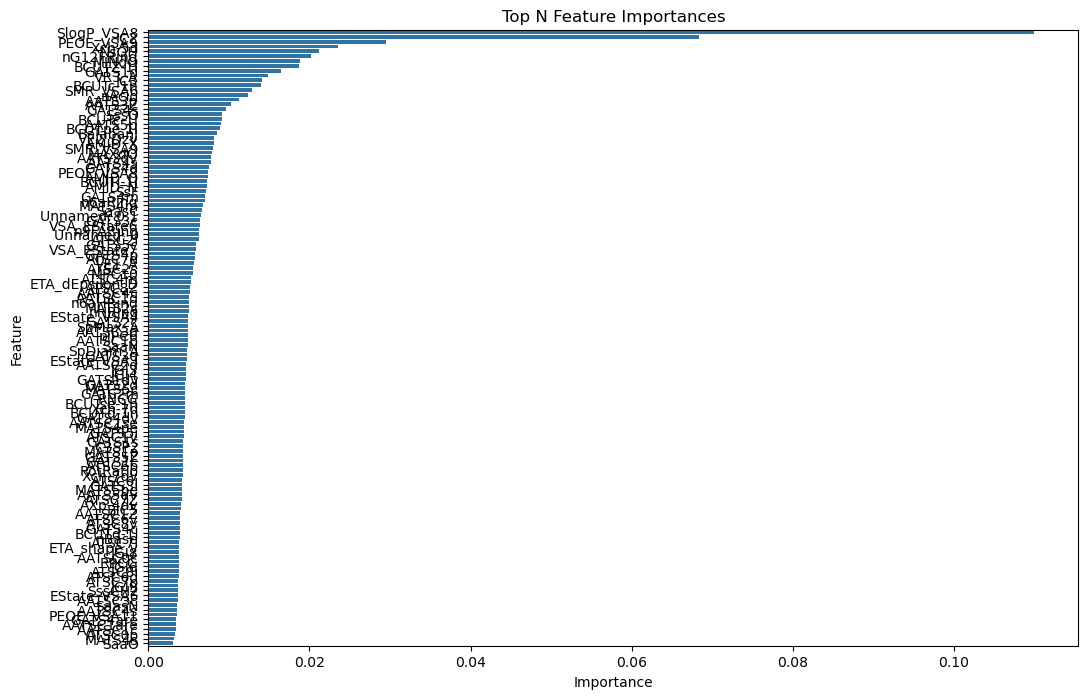

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# 查看top n个特征的重要度
top_n = 128  
top_features = feature_importance.head(top_n)

# 绘制特征重要度的条形图
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top N Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
print(top_features['Feature'])
plt.show()

In [ ]:
# # 假设你想查看重要度大于0.1的特征
# threshold = 0.001  # 你可以根据需要更改这个值
# important_features = feature_importance[feature_importance['Importance'] > threshold]

# # 绘制特征重要度的条形图
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Importance', y='Feature', data=important_features)
# plt.title('Feature Importances Greater Than Threshold')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# print(f"重要特征数量: {important_features.shape[0]}")
# plt.show()

In [73]:

selected_features = top_features['Feature'].tolist()
columns=X_train.columns
print(len(selected_features))
print(selected_features)
for cc in columns:
    print(cc,)

128
['SlogP_VSA8', 'IC2', 'PEOE_VSA9', 'Xch-5d', 'NsOH', 'nG12FRing', 'MINdO', 'BCUTZ-1l', 'GATS1d', 'VR3_A', 'IC3', 'BCUTc-1h', 'SMR_VSA6', 'nAcid', 'AATS3p', 'AATS3Z', 'GATS4s', 'SssO', 'BCUTc-1l', 'AATS5p', 'BCUTpe-1l', 'BalabanJ', 'VE2_Dzv', 'AMID_X', 'SMR_VSA9', 'MAXdO', 'AATS3dv', 'AATS4s', 'GATS4d', 'PEOE_VSA8', 'AMID_O', 'BCUTi-1l', 'AMID_N', 'SsF', 'GATS4m', 'n6aRing', 'MATS4m', 'SaasC', 'Unnamed: 0.1', 'GATS3c', 'VSA_EState6', 'n9FARing', 'Unnamed: 0', 'ATSC2i', 'GATS5c', 'VSA_EState7', 'GATS4p', 'ATSC7d', 'VE1_A', 'ATSC2s', 'MPC10', 'ATSC4m', 'ETA_dEpsilon_D', 'ATSC8Z', 'AATSC4c', 'AATSC1d', 'n6aHRing', 'MATS2c', 'nHRing', 'EState_VSA4', 'GATS2c', 'SpMax_A', 'AATSC3d', 'piPC6', 'AATSC1p', 'SaaN', 'SpDiam_A', 'GATS3d', 'EState_VSA3', 'AATSC2d', 'JGI3', 'JGI4', 'GATS1dv', 'GATS2d', 'MATS5c', 'GATS2m', 'RNCG', 'BCUTse-1h', 'Xch-7d', 'BCUTd-1h', 'GATS4dv', 'AATSC1se', 'MATS4pe', 'GATS5i', 'ATSC1v', 'GATS1s', 'C3SP2', 'MATS1p', 'GATS5Z', 'GATS1c', 'ATSC6p', 'RotRatio', 'Xch-7dv',

In [54]:
import os
import pandas as pd
import numpy as np
import re
import json
from scipy.stats import pearsonr
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors
#from rdkit.Chem import MoleculeDescriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors

def canonicalize_smiles(smiles):
    """
    Return RDKit canonicalize SMILES.
    """
    return Chem.MolToSmiles(Chem.MolFromSmiles(smiles))

def calc_mordred_2Ddescriptors(smiles_list, file_path):
    """
    Calculate 1275 types (correctly calculated) Mordred 2D descriptors.
    Some calculations may not be possible if the computing environment or input molecules are different.
    """
    if not os.path.exists(file_path):
        mols = [Chem.AddHs(Chem.MolFromSmiles(smi)) for smi in smiles_list]
        '''
        my_desc_names = ['ABC','ABCGG','nAcid','nBase','SpAbs_A','SpMax_A','SpDiam_A','SpAD_A','SpMAD_A','LogEE_A','VE1_A','VE2_A','VE3_A','VR1_A','VR2_A','VR3_A','nAromAtom','nAromBond','nAtom','nHeavyAtom','nSpiro','nBridgehead','nHetero','nH','nB','nC','nN','nO','nS','nP','nF','nCl','nBr','nI','nX','ATS0dv','ATS1dv','ATS2dv','ATS3dv','ATS4dv','ATS5dv','ATS6dv','ATS7dv','ATS8dv','ATS0d','ATS1d','ATS2d','ATS3d','ATS4d','ATS5d','ATS6d','ATS7d','ATS8d','ATS0s','ATS1s','ATS2s','ATS3s','ATS4s','ATS5s','ATS6s','ATS7s','ATS8s','ATS0Z','ATS1Z','ATS2Z','ATS3Z','ATS4Z','ATS5Z','ATS6Z','ATS7Z','ATS8Z','ATS0m','ATS1m','ATS2m','ATS3m','ATS4m','ATS5m','ATS6m','ATS7m','ATS8m','ATS0v','ATS1v','ATS2v','ATS3v','ATS4v','ATS5v','ATS6v','ATS7v','ATS8v','ATS0se','ATS1se','ATS2se','ATS3se','ATS4se','ATS5se','ATS6se','ATS7se','ATS8se','ATS0pe','ATS1pe','ATS2pe','ATS3pe','ATS4pe','ATS5pe','ATS6pe','ATS7pe','ATS8pe','ATS0are','ATS1are','ATS2are','ATS3are','ATS4are','ATS5are','ATS6are','ATS7are','ATS8are','ATS0p','ATS1p','ATS2p','ATS3p','ATS4p','ATS5p','ATS6p','ATS7p','ATS8p','ATS0i','ATS1i','ATS2i','ATS3i','ATS4i','ATS5i','ATS6i','ATS7i','ATS8i','AATS0dv','AATS1dv','AATS2dv','AATS3dv','AATS4dv','AATS5dv','AATS0d','AATS1d','AATS2d','AATS3d','AATS4d','AATS5d','AATS0s','AATS1s','AATS2s','AATS3s','AATS4s','AATS5s','AATS0Z','AATS1Z','AATS2Z','AATS3Z','AATS4Z','AATS5Z','AATS0m','AATS1m','AATS2m','AATS3m','AATS4m','AATS5m','AATS0v','AATS1v','AATS2v','AATS3v','AATS4v','AATS5v','AATS0se','AATS1se','AATS2se','AATS3se','AATS4se','AATS5se','AATS0pe','AATS1pe','AATS2pe','AATS3pe','AATS4pe','AATS5pe','AATS0are','AATS1are','AATS2are','AATS3are','AATS4are','AATS5are','AATS0p','AATS1p','AATS2p','AATS3p','AATS4p','AATS5p','AATS0i','AATS1i','AATS2i','AATS3i','AATS4i','AATS5i','ATSC0c','ATSC1c','ATSC2c','ATSC3c','ATSC4c','ATSC5c','ATSC6c','ATSC7c','ATSC8c','ATSC0dv','ATSC1dv','ATSC2dv','ATSC3dv','ATSC4dv','ATSC5dv','ATSC6dv','ATSC7dv','ATSC8dv','ATSC0d','ATSC1d','ATSC2d','ATSC3d','ATSC4d','ATSC5d','ATSC6d','ATSC7d','ATSC8d','ATSC0s','ATSC1s','ATSC2s','ATSC3s','ATSC4s','ATSC5s','ATSC6s','ATSC7s','ATSC8s','ATSC0Z','ATSC1Z','ATSC2Z','ATSC3Z','ATSC4Z','ATSC5Z','ATSC6Z','ATSC7Z','ATSC8Z','ATSC0m','ATSC1m','ATSC2m','ATSC3m','ATSC4m','ATSC5m','ATSC6m','ATSC7m','ATSC8m','ATSC0v','ATSC1v','ATSC2v','ATSC3v','ATSC4v','ATSC5v','ATSC6v','ATSC7v','ATSC8v','ATSC0se','ATSC1se','ATSC2se','ATSC3se','ATSC4se','ATSC5se','ATSC6se','ATSC7se','ATSC8se','ATSC0pe','ATSC1pe','ATSC2pe','ATSC3pe','ATSC4pe','ATSC5pe','ATSC6pe','ATSC7pe','ATSC8pe','ATSC0are','ATSC1are','ATSC2are','ATSC3are','ATSC4are','ATSC5are','ATSC6are','ATSC7are','ATSC8are','ATSC0p','ATSC1p','ATSC2p','ATSC3p','ATSC4p','ATSC5p','ATSC6p','ATSC7p','ATSC8p','ATSC0i','ATSC1i','ATSC2i','ATSC3i','ATSC4i','ATSC5i','ATSC6i','ATSC7i','ATSC8i','AATSC0c','AATSC1c','AATSC2c','AATSC3c','AATSC4c','AATSC5c','AATSC0dv','AATSC1dv','AATSC2dv','AATSC3dv','AATSC4dv','AATSC5dv','AATSC0d','AATSC1d','AATSC2d','AATSC3d','AATSC4d','AATSC5d','AATSC0s','AATSC1s','AATSC2s','AATSC3s','AATSC4s','AATSC5s','AATSC0Z','AATSC1Z','AATSC2Z','AATSC3Z','AATSC4Z','AATSC5Z','AATSC0m','AATSC1m','AATSC2m','AATSC3m','AATSC4m','AATSC5m','AATSC0v','AATSC1v','AATSC2v','AATSC3v','AATSC4v','AATSC5v','AATSC0se','AATSC1se','AATSC2se','AATSC3se','AATSC4se','AATSC5se','AATSC0pe','AATSC1pe','AATSC2pe','AATSC3pe','AATSC4pe','AATSC5pe','AATSC0are','AATSC1are','AATSC2are','AATSC3are','AATSC4are','AATSC5are','AATSC0p','AATSC1p','AATSC2p','AATSC3p','AATSC4p','AATSC5p','AATSC0i','AATSC1i','AATSC2i','AATSC3i','AATSC4i','AATSC5i','MATS1c','MATS2c','MATS3c','MATS4c','MATS5c','MATS1dv','MATS2dv','MATS3dv','MATS4dv','MATS5dv','MATS1d','MATS2d','MATS3d','MATS4d','MATS5d','MATS1s','MATS2s','MATS3s','MATS4s','MATS5s','MATS1Z','MATS2Z','MATS3Z','MATS4Z','MATS5Z','MATS1m','MATS2m','MATS3m','MATS4m','MATS5m','MATS1v','MATS2v','MATS3v','MATS4v','MATS5v','MATS1se','MATS2se','MATS3se','MATS4se','MATS5se','MATS1pe','MATS2pe','MATS3pe','MATS4pe','MATS5pe','MATS1are','MATS2are','MATS3are','MATS4are','MATS5are','MATS1p','MATS2p','MATS3p','MATS4p','MATS5p','MATS1i','MATS2i','MATS3i','MATS4i','MATS5i','GATS1c','GATS2c','GATS3c','GATS4c','GATS5c','GATS1dv','GATS2dv','GATS3dv','GATS4dv','GATS5dv','GATS1d','GATS2d','GATS3d','GATS4d','GATS5d','GATS1s','GATS2s','GATS3s','GATS4s','GATS5s','GATS1Z','GATS2Z','GATS3Z','GATS4Z','GATS5Z','GATS1m','GATS2m','GATS3m','GATS4m','GATS5m','GATS1v','GATS2v','GATS3v','GATS4v','GATS5v','GATS1se','GATS2se','GATS3se','GATS4se','GATS5se','GATS1pe','GATS2pe','GATS3pe','GATS4pe','GATS5pe','GATS1are','GATS2are','GATS3are','GATS4are','GATS5are','GATS1p','GATS2p','GATS3p','GATS4p','GATS5p','GATS1i','GATS2i','GATS3i','GATS4i','GATS5i','BCUTc-1h','BCUTc-1l','BCUTdv-1h','BCUTdv-1l','BCUTd-1h','BCUTd-1l','BCUTs-1h','BCUTs-1l','BCUTZ-1h','BCUTZ-1l','BCUTm-1h','BCUTm-1l','BCUTv-1h','BCUTv-1l','BCUTse-1h','BCUTse-1l','BCUTpe-1h','BCUTpe-1l','BCUTare-1h','BCUTare-1l','BCUTp-1h','BCUTp-1l','BCUTi-1h','BCUTi-1l','BalabanJ','SpAbs_DzZ','SpMax_DzZ','SpDiam_DzZ','SpAD_DzZ','SpMAD_DzZ','LogEE_DzZ','SM1_DzZ','VE1_DzZ','VE2_DzZ','VE3_DzZ','VR1_DzZ','VR2_DzZ','VR3_DzZ','SpAbs_Dzm','SpMax_Dzm','SpDiam_Dzm','SpAD_Dzm','SpMAD_Dzm','LogEE_Dzm','SM1_Dzm','VE1_Dzm','VE2_Dzm','VE3_Dzm','VR1_Dzm','VR2_Dzm','VR3_Dzm','SpAbs_Dzv','SpMax_Dzv','SpDiam_Dzv','SpAD_Dzv','SpMAD_Dzv','LogEE_Dzv','SM1_Dzv','VE1_Dzv','VE2_Dzv','VE3_Dzv','VR1_Dzv','VR2_Dzv','VR3_Dzv','SpAbs_Dzse','SpMax_Dzse','SpDiam_Dzse','SpAD_Dzse','SpMAD_Dzse','LogEE_Dzse','SM1_Dzse','VE1_Dzse','VE2_Dzse','VE3_Dzse','VR1_Dzse','VR2_Dzse','VR3_Dzse','SpAbs_Dzpe','SpMax_Dzpe','SpDiam_Dzpe','SpAD_Dzpe','SpMAD_Dzpe','LogEE_Dzpe','SM1_Dzpe','VE1_Dzpe','VE2_Dzpe','VE3_Dzpe','VR1_Dzpe','VR2_Dzpe','VR3_Dzpe','SpAbs_Dzare','SpMax_Dzare','SpDiam_Dzare','SpAD_Dzare','SpMAD_Dzare','LogEE_Dzare','SM1_Dzare','VE1_Dzare','VE2_Dzare','VE3_Dzare','VR1_Dzare','VR2_Dzare','VR3_Dzare','SpAbs_Dzp','SpMax_Dzp','SpDiam_Dzp','SpAD_Dzp','SpMAD_Dzp','LogEE_Dzp','SM1_Dzp','VE1_Dzp','VE2_Dzp','VE3_Dzp','VR1_Dzp','VR2_Dzp','VR3_Dzp','SpAbs_Dzi','SpMax_Dzi','SpDiam_Dzi','SpAD_Dzi','SpMAD_Dzi','LogEE_Dzi','SM1_Dzi','VE1_Dzi','VE2_Dzi','VE3_Dzi','VR1_Dzi','VR2_Dzi','VR3_Dzi','BertzCT','nBonds','nBondsO','nBondsS','nBondsD','nBondsT','nBondsA','nBondsM','nBondsKS','nBondsKD','RNCG','RPCG','C1SP1','C2SP1','C1SP2','C2SP2','C3SP2','C1SP3','C2SP3','C3SP3','C4SP3','HybRatio','FCSP3','Xch-3d','Xch-4d','Xch-5d','Xch-6d','Xch-7d','Xch-3dv','Xch-4dv','Xch-5dv','Xch-6dv','Xch-7dv','Xc-3d','Xc-4d','Xc-5d','Xc-6d','Xc-3dv','Xc-4dv','Xc-5dv','Xc-6dv','Xpc-4d','Xpc-5d','Xpc-6d','Xpc-4dv','Xpc-5dv','Xpc-6dv','Xp-0d','Xp-1d','Xp-2d','Xp-3d','Xp-4d','Xp-5d','Xp-6d','Xp-7d','AXp-0d','AXp-1d','AXp-2d','AXp-3d','AXp-4d','Xp-0dv','Xp-1dv','Xp-2dv','Xp-3dv','Xp-4dv','Xp-5dv','Xp-6dv','Xp-7dv','AXp-0dv','AXp-1dv','AXp-2dv','AXp-3dv','AXp-4dv','SZ','Sm','Sv','Sse','Spe','Sare','Sp','Si','MZ','Mm','Mv','Mse','Mpe','Mare','Mp','Mi','SpAbs_D','SpMax_D','SpDiam_D','SpAD_D','SpMAD_D','LogEE_D','VE1_D','VE2_D','VE3_D','VR1_D','VR2_D','VR3_D','NsLi','NssBe','NssssBe','NssBH','NsssB','NssssB','NsCH3','NdCH2','NssCH2','NtCH','NdsCH','NaaCH','NsssCH','NddC','NtsC','NdssC','NaasC','NaaaC','NssssC','NsNH3','NsNH2','NssNH2','NdNH','NssNH','NaaNH','NtN','NsssNH','NdsN','NaaN','NsssN','NddsN','NaasN','NssssN','NsOH','NdO','NssO','NaaO','NsF','NsSiH3','NssSiH2','NsssSiH','NssssSi','NsPH2','NssPH','NsssP','NdsssP','NsssssP','NsSH','NdS','NssS','NaaS','NdssS','NddssS','NsCl','NsGeH3','NssGeH2','NsssGeH','NssssGe','NsAsH2','NssAsH','NsssAs','NsssdAs','NsssssAs','NsSeH','NdSe','NssSe','NaaSe','NdssSe','NddssSe','NsBr','NsSnH3','NssSnH2','NsssSnH','NssssSn','NsI','NsPbH3','NssPbH2','NsssPbH','NssssPb','SsLi','SssBe','SssssBe','SssBH','SsssB','SssssB','SsCH3','SdCH2','SssCH2','StCH','SdsCH','SaaCH','SsssCH','SddC','StsC','SdssC','SaasC','SaaaC','SssssC','SsNH3','SsNH2','SssNH2','SdNH','SssNH','SaaNH','StN','SsssNH','SdsN','SaaN','SsssN','SddsN','SaasN','SssssN','SsOH','SdO','SssO','SaaO','SsF','SsSiH3','SssSiH2','SsssSiH','SssssSi','SsPH2','SssPH','SsssP','SdsssP','SsssssP','SsSH','SdS','SssS','SaaS','SdssS','SddssS','SsCl','SsGeH3','SssGeH2','SsssGeH','SssssGe','SsAsH2','SssAsH','SsssAs','SsssdAs','SsssssAs','SsSeH','SdSe','SssSe','SaaSe','SdssSe','SddssSe','SsBr','SsSnH3','SssSnH2','SsssSnH','SssssSn','SsI','SsPbH3','SssPbH2','SsssPbH','SssssPb','MAXdO','MINdO','ECIndex','ETA_alpha','AETA_alpha','ETA_shape_p','ETA_shape_y','ETA_shape_x','ETA_beta','AETA_beta','ETA_beta_s','AETA_beta_s','ETA_beta_ns','AETA_beta_ns','ETA_beta_ns_d','AETA_beta_ns_d','ETA_eta','AETA_eta','ETA_eta_L','AETA_eta_L','ETA_eta_R','AETA_eta_R','ETA_eta_RL','AETA_eta_RL','ETA_eta_F','AETA_eta_F','ETA_eta_FL','AETA_eta_FL','ETA_eta_B','AETA_eta_B','ETA_eta_BR','AETA_eta_BR','ETA_dAlpha_A','ETA_dAlpha_B','ETA_epsilon_1','ETA_epsilon_2','ETA_epsilon_3','ETA_epsilon_4','ETA_epsilon_5','ETA_dEpsilon_A','ETA_dEpsilon_B','ETA_dEpsilon_C','ETA_dEpsilon_D','ETA_dBeta','AETA_dBeta','ETA_psi_1','ETA_dPsi_A','ETA_dPsi_B','fragCpx','fMF','nHBAcc','nHBDon','IC0','IC1','IC2','IC3','IC4','IC5','TIC0','TIC1','TIC2','TIC3','TIC4','TIC5','SIC0','SIC1','SIC2','SIC3','SIC4','SIC5','BIC0','BIC1','BIC2','BIC3','BIC4','BIC5','CIC0','CIC1','CIC2','CIC3','CIC4','CIC5','MIC0','MIC1','MIC2','MIC3','MIC4','MIC5','ZMIC0','ZMIC1','ZMIC2','ZMIC3','ZMIC4','ZMIC5','Kier1','Kier2','Kier3','FilterItLogS','VMcGowan','LabuteASA','PEOE_VSA1','PEOE_VSA2','PEOE_VSA3','PEOE_VSA4','PEOE_VSA5','PEOE_VSA6','PEOE_VSA7','PEOE_VSA8','PEOE_VSA9','PEOE_VSA10','PEOE_VSA11','PEOE_VSA12','PEOE_VSA13','SMR_VSA1','SMR_VSA2','SMR_VSA3','SMR_VSA4','SMR_VSA5','SMR_VSA6','SMR_VSA7','SMR_VSA8','SMR_VSA9','SlogP_VSA1','SlogP_VSA2','SlogP_VSA3','SlogP_VSA4','SlogP_VSA5','SlogP_VSA6','SlogP_VSA7','SlogP_VSA8','SlogP_VSA9','SlogP_VSA10','SlogP_VSA11','EState_VSA1','EState_VSA2','EState_VSA3','EState_VSA4','EState_VSA5','EState_VSA6','EState_VSA7','EState_VSA8','EState_VSA9','EState_VSA10','VSA_EState1','VSA_EState2','VSA_EState3','VSA_EState4','VSA_EState5','VSA_EState6','VSA_EState7','VSA_EState8','VSA_EState9','MID','AMID','MID_h','AMID_h','MID_C','AMID_C','MID_N','AMID_N','MID_O','AMID_O','MID_X','AMID_X','MPC2','MPC3','MPC4','MPC5','MPC6','MPC7','MPC8','MPC9','MPC10','TMPC10','piPC1','piPC2','piPC3','piPC4','piPC5','piPC6','piPC7','piPC8','piPC9','piPC10','TpiPC10','apol','bpol','nRing','n3Ring','n4Ring','n5Ring','n6Ring','n7Ring','n8Ring','n9Ring','n10Ring','n11Ring','n12Ring','nG12Ring','nHRing','n3HRing','n4HRing','n5HRing','n6HRing','n7HRing','n8HRing','n9HRing','n10HRing','n11HRing','n12HRing','nG12HRing','naRing','n3aRing','n4aRing','n5aRing','n6aRing','n7aRing','n8aRing','n9aRing','n10aRing','n11aRing','n12aRing','nG12aRing','naHRing','n3aHRing','n4aHRing','n5aHRing','n6aHRing','n7aHRing','n8aHRing','n9aHRing','n10aHRing','n11aHRing','n12aHRing','nG12aHRing','nARing','n3ARing','n4ARing','n5ARing','n6ARing','n7ARing','n8ARing','n9ARing','n10ARing','n11ARing','n12ARing','nG12ARing','nAHRing','n3AHRing','n4AHRing','n5AHRing','n6AHRing','n7AHRing','n8AHRing','n9AHRing','n10AHRing','n11AHRing','n12AHRing','nG12AHRing','nFRing','n4FRing','n5FRing','n6FRing','n7FRing','n8FRing','n9FRing','n10FRing','n11FRing','n12FRing','nG12FRing','nFHRing','n4FHRing','n5FHRing','n6FHRing','n7FHRing','n8FHRing','n9FHRing','n10FHRing','n11FHRing','n12FHRing','nG12FHRing','nFaRing','n4FaRing','n5FaRing','n6FaRing','n7FaRing','n8FaRing','n9FaRing','n10FaRing','n11FaRing','n12FaRing','nG12FaRing','nFaHRing','n4FaHRing','n5FaHRing','n6FaHRing','n7FaHRing','n8FaHRing','n9FaHRing','n10FaHRing','n11FaHRing','n12FaHRing','nG12FaHRing','nFARing','n4FARing','n5FARing','n6FARing','n7FARing','n8FARing','n9FARing','n10FARing','n11FARing','n12FARing','nG12FARing','nFAHRing','n4FAHRing','n5FAHRing','n6FAHRing','n7FAHRing','n8FAHRing','n9FAHRing','n10FAHRing','n11FAHRing','n12FAHRing','nG12FAHRing','nRot','RotRatio','SLogP','SMR','TopoPSA(NO)','TopoPSA','GGI1','GGI2','GGI3','GGI4','GGI5','GGI6','GGI7','GGI8','GGI9','GGI10','JGI1','JGI2','JGI3','JGI4','JGI5','JGI6','JGI7','JGI8','JGI9','JGI10','JGT10','Diameter','Radius','TopoShapeIndex','PetitjeanIndex','Vabc','VAdjMat','MWC01','MWC02','MWC03','MWC04','MWC05','MWC06','MWC07','MWC08','MWC09','MWC10','TMWC10','SRW02','SRW03','SRW04','SRW05','SRW06','SRW07','SRW08','SRW09','SRW10','TSRW10','MW','AMW','WPath','WPol','Zagreb1','Zagreb2','mZagreb1','mZagreb2']'''






        print(len(selected_features))
        my_desc_names =selected_features
        print(my_desc_names)
        my_descs = []
        # NOTE: ignore_3D=True
        calc_dummy = Calculator(descriptors, ignore_3D=True)
        for i, desc in enumerate(calc_dummy.descriptors):
            if desc.__str__()  in my_desc_names:
                my_descs.append(desc)
        calc = Calculator(my_descs, ignore_3D=True)
        df_mordred = calc.pandas(mols)
        df_mordred.to_csv(file_path, index=False)
        print('初始版已保存') # 如果是val或者test可以在这里打断点
    
        df_mordred = df_mordred.apply(lambda x: pd.to_numeric(x, errors='coerce'))####
        df_mordred = df_mordred.dropna(axis=1, how='all')
        df_mordred = df_mordred.fillna(df_mordred.mean())
        df_mordred = df_mordred.replace([np.inf, -np.inf], np.nan).fillna(df_mordred.max())
        df_mordred.to_csv(file_path, index=False)
    else:
        print("Mordred 2D descriptors already exists.")
        
def calc_rdkit_descriptors(smiles_list, file_path):
    """
    Calculate 208 types RDKit 2D descriptors.
    """
    if not os.path.exists(file_path):
        descs = [desc_name[0] for desc_name in Chem.Descriptors._descList]
        #desc_calc = MoleculeDescriptors.MolecularDescriptorCalculator(descs)
        desc_calc = MoleculeDescriptors.MolecularDescriptorCalculator(descs)
        # Add Hs
        df_desc = pd.DataFrame([desc_calc.CalcDescriptors(Chem.AddHs(Chem.MolFromSmiles(smi))) for smi in tqdm(smiles_list)])
        df_desc.columns = descs
        df_desc = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
        df_desc = df_desc.fillna(df_desc.mean())
        df_desc = df_desc.replace([np.inf, -np.inf], np.nan).fillna(df_desc.max())
        df_desc.to_csv(file_path, index=False)
    else:
        print("RDKit descriptors already exists.")
    return pd.read_csv(file_path)


def delete_standard_deviation(x):
    """
    Delete features with standard deviation of 0.
    """
    features_delete_std = []
    for i in x:
        std = np.std(x[i])
        if (std == 0):
            features_delete_std.append(i)
    return features_delete_std


def delete_similarity(X, y, threshold=0.9):
    """
    For descriptor pairs whose correlation > th,
    eliminate the one with the lower correlation with the objective variable y.
    """
    features_delete = set()

    for i in range(X.shape[1]):
        if X.columns[i] in features_delete:
            continue
        a = X.iloc[:, i].values
        for j in range(i):
            if X.columns[j] in features_delete:
                continue
            b = X.iloc[:, j].values
            R = abs(pearsonr(a, b)[0])
            if R > threshold:
                cor_a = abs(pearsonr(a, y)[0])
                cor_b = abs(pearsonr(b, y)[0])
                if cor_a <= cor_b:
                    features_delete.add(X.columns[i])
                else:
                    features_delete.add(X.columns[j])

    return list(features_delete)


def entire_preprocessing(x, y, threshold=0.9):
    """
    Preprocess the peptide descriptors.
    """
    features_delete_std = delete_standard_deviation(x)
    x = x.drop(features_delete_std, axis=1)
    print(f'Deleted by standard deviation: {len(features_delete_std)}')

    features_delete_R = delete_similarity(x, y, threshold)
    x = x.drop(features_delete_R, axis=1)
    print(f'Deleted by similarity: {len(features_delete_R)}')

    # Z-score
    data_preprocessed = x.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

    print(f'Feature map shape: {data_preprocessed.shape}')
    return features_delete_std, features_delete_R, data_preprocessed

# 读取 JSON 文件
with open("data/ec50/lbap_core_ec50_size_brics.json", "r") as f:###############################################
    data = json.load(f)


#print("First item in train_data:", train_data[0])
# 遍历所有数字编号下的化合物，提取 smiles
train_data = data["split"]["train"]################################
smiles_list = [item["smiles"] for item in train_data]
target_column = [item["reg_label"] for item in train_data]


# 提取所有对象的 "smiles" 字段
#smiles_list = [item["smiles"] for item in data]

# 描述符文件保存路径
desc_file_path = 'data/ec50/processed_data/proc_descriptors_train_size_brics.csv'############################
# 随机生成目标列，确保长度和 SMILES 列表长度一致
#target_column = pd.Series(np.random.rand(len(smiles_list)))

# 计算描述符
df_desc = calc_mordred_2Ddescriptors(smiles_list, desc_file_path)
df_desc = pd.read_csv(desc_file_path)

#下面的部分在第一次跑train的时候，要记得取消备注
# # 进行预处理，筛选重要描述符
# features_delete_std, features_delete_R, preprocessed_data = entire_preprocessing(df_desc, target_column)
# preprocessed_data.to_csv(desc_file_path)
# print('文件已保存为', desc_file_path)

# print("删除标准差的特征：")
# print(features_delete_std)

# print("删除相似度的特征：")
# print(features_delete_R)
# print("筛选后的描述符数据：")
# print(preprocessed_data)

Mordred 2D descriptors already exists.


In [62]:
print(selected_features)
print(len(selected_features)   )

['SlogP_VSA8', 'IC2', 'PEOE_VSA9', 'Xch-5d', 'NsOH', 'nG12FRing', 'MINdO', 'BCUTZ-1l', 'GATS1d', 'VR3_A', 'IC3', 'BCUTc-1h', 'SMR_VSA6', 'nAcid', 'AATS3p', 'AATS3Z', 'GATS4s', 'SssO', 'BCUTc-1l', 'AATS5p', 'BCUTpe-1l', 'BalabanJ', 'VE2_Dzv', 'AMID_X', 'SMR_VSA9', 'MAXdO', 'AATS3dv', 'AATS4s', 'GATS4d', 'PEOE_VSA8', 'AMID_O', 'BCUTi-1l', 'AMID_N', 'SsF', 'GATS4m', 'n6aRing', 'MATS4m', 'SaasC', 'Unnamed: 0.1', 'GATS3c', 'VSA_EState6', 'n9FARing', 'Unnamed: 0', 'ATSC2i', 'GATS5c', 'VSA_EState7', 'GATS4p', 'ATSC7d', 'VE1_A', 'ATSC2s', 'MPC10', 'ATSC4m', 'ETA_dEpsilon_D', 'ATSC8Z', 'AATSC4c', 'AATSC1d', 'n6aHRing', 'MATS2c', 'nHRing', 'EState_VSA4', 'GATS2c', 'SpMax_A', 'AATSC3d', 'piPC6', 'AATSC1p', 'SaaN', 'SpDiam_A', 'GATS3d', 'EState_VSA3', 'AATSC2d', 'JGI3', 'JGI4', 'GATS1dv', 'GATS2d', 'MATS5c', 'GATS2m', 'RNCG', 'BCUTse-1h', 'Xch-7d', 'BCUTd-1h', 'GATS4dv', 'AATSC1se', 'MATS4pe', 'GATS5i', 'ATSC1v', 'GATS1s', 'C3SP2', 'MATS1p', 'GATS5Z', 'GATS1c', 'ATSC6p', 'RotRatio', 'Xch-7dv', 'AT

In [26]:

# 读取CSV文件
df = pd.read_csv('data/ec50/processed_data/proc_descriptors_train_size_brics.csv')

# 选择你想要的列，将'列名1', '列名2'替换为你要的列的实际名称
selected_columns = df.loc[:, selected_features]
# 将选中的列保存到新的CSV文件中
selected_columns.to_csv('data/ec50/processed_data/proc_descriptors_train_size_brics.csv', index=False)

In [49]:
desc_file_path = f'data\ec50\processed_data\proc_descriptors_ood_val_size_brics.csv'###
df_mordred = pd.read_csv(desc_file_path)

X_train = df_mordred
# 将缩放后的数据转换为DataFrame
X_scaled = scaler.transform(X_train)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)
X_scaled_df.to_csv(desc_file_path, index=False)

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_66480\3747341184.py:1: SyntaxWarning: invalid escape sequence '\e'
  desc_file_path = f'data\ec50\processed_data\proc_descriptors_ood_val_size_brics.csv'###


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AATS1i
- AATS3d
- AATS3i
- AATS4i
- AATS4p
- ...
Feature names seen at fit time, yet now missing:
- AATS3Z
- AATS4s
- AATS5dv
- AATSC0c
- AATSC1Z
- ...


标准化

In [ ]:
import pandas as pd

# 读取三个CSV文件
df1 = pd.read_csv('data\ec50\processed_data\proc_descriptors_train_scaffold_brics_with_smiles.csv')##
df2 = pd.read_csv('data\ec50\processed_data\proc_descriptors_ood_val_scaffold_brics_with_smiles.csv')##
df3 = pd.read_csv('data\ec50\processed_data\proc_descriptors_ood_test_scaffold_brics_with_smiles.csv')##

# 纵向拼接（axis=0表示行方向）
combined_df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

# 保存结果
combined_df.to_csv('data/ec50/processed_data/proc_descriptors_size_combined.csv', index=False)#######